In [3]:
import pandas as pd

In [4]:
# read kaggle taitanic train data
target_file_path = "../../titanic/train.csv"
df_origin = pd.read_csv(target_file_path)

df_origin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 前処理

In [5]:
from sklearn.model_selection import train_test_split
#欠損値処理
df_origin['Fare'] = df_origin['Fare'].fillna(df_origin['Fare'].median())
df_origin['Age'] = df_origin['Age'].fillna(df_origin['Age'].median())
df_origin['Embarked'] = df_origin['Embarked'].fillna('S')

#カテゴリ変数の変換
df_origin['Sex'] = df_origin['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df_origin['Embarked'] = df_origin['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_origin = df_origin.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
train_X = df_origin.drop('Survived', axis=1)
train_y = df_origin.Survived
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

### 学習

In [6]:
#ランダムフォレスト
#n_estimators:木をいくつ生成するか。デフォルトでは10。
#max_depth:木の深さの設定
#max_features:分岐に用いる説明変数の数を設定
#min_sample_split:分割する際の最小のサンプル数を設定
#random_state:seedの設定。seedを設定しないとモデルが毎回変わるので注意。

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score)

clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

print("AUC:{}".format(auc(fpr, tpr)))
print("正解率:{}".format(accuracy_score(pred, test_y)))

AUC:0.7842882695747505
正解率:0.8022388059701493


/Users/ryo_tanaka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### ROC曲線の可視化

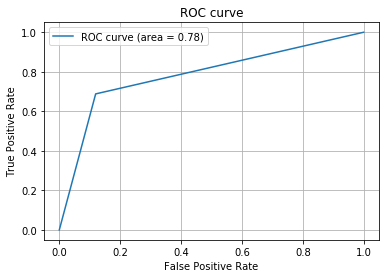

In [8]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### 変数重要度の可視化

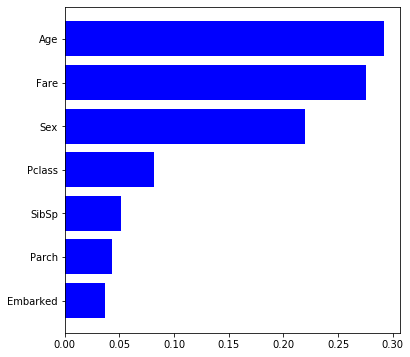

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

features = train_X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()